<a href="https://colab.research.google.com/github/Leen-Alsharbaji/ColonCancerDetection/blob/main/Colon_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

import os
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint


from tensorflow.keras.utils import plot_model

import pandas as pd

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Flatten, Input

import kagglehub

GEt the dataset

In [ ]:
# Kaggle'dan veri setini indirme
path = kagglehub.dataset_download("falahgatea/colon-cancer-dataset")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/falahgatea/colon-cancer-dataset/versions/1


In [ ]:
# Dataset dosyalarını listele
dataset_path = '/root/.cache/kagglehub/datasets/falahgatea/colon-cancer-dataset/versions/1'
files = os.listdir(dataset_path)
print("Dizindeki dosyalar:", files)

Dizindeki dosyalar: ['colon_image_sets']


In [ ]:
image_sets_path = os.path.join(dataset_path, 'colon_image_sets')
image_files = os.listdir(image_sets_path)
print("Görüntü dosyaları:", image_files)

Görüntü dosyaları: ['colon_aca', 'colon_n']


In [ ]:
# Veri seti klasörünün yolu
dataset_path = '/root/.cache/kagglehub/datasets/falahgatea/colon-cancer-dataset/versions/1/colon_image_sets'

# ImageDataGenerator ile veri ön işleme
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)




In [ ]:
# Eğitim verisi ve doğrulama verisi oluşturma
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',  # Kolon kanseri (colon_aca) ve sağlıklı (colon_n) olarak iki sınıf
    subset='training',  # Eğitim verisi
    shuffle=True
)



Found 8000 images belonging to 2 classes.


In [ ]:
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  #
    batch_size=32,
    class_mode='binary',  # Kolon kanseri (colon_aca) ve sağlıklı (colon_n) olarak iki sınıf
    subset='validation',  # Doğrulama verisi
    shuffle=True
)

Found 2000 images belonging to 2 classes.


Create the model

In [ ]:
input = Input(shape=(224,224,3))

conv1 = Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(input)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(pool1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.001))(pool2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

gap = GlobalAveragePooling2D()(pool3)

dense_1 = Dense(64, activation='relu')(gap)
drop_1 = Dropout(0.2)(dense_1)

output = Dense(1, activation="sigmoid")(drop_1)


In [ ]:
model = Model(inputs=input,outputs=output)
optimizer = Adam(learning_rate=1e-3)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,569 (396.75 KB)

 Trainable params: 101,569 (396.75 KB)

 Non-trainable params: 0 (0.00 B)

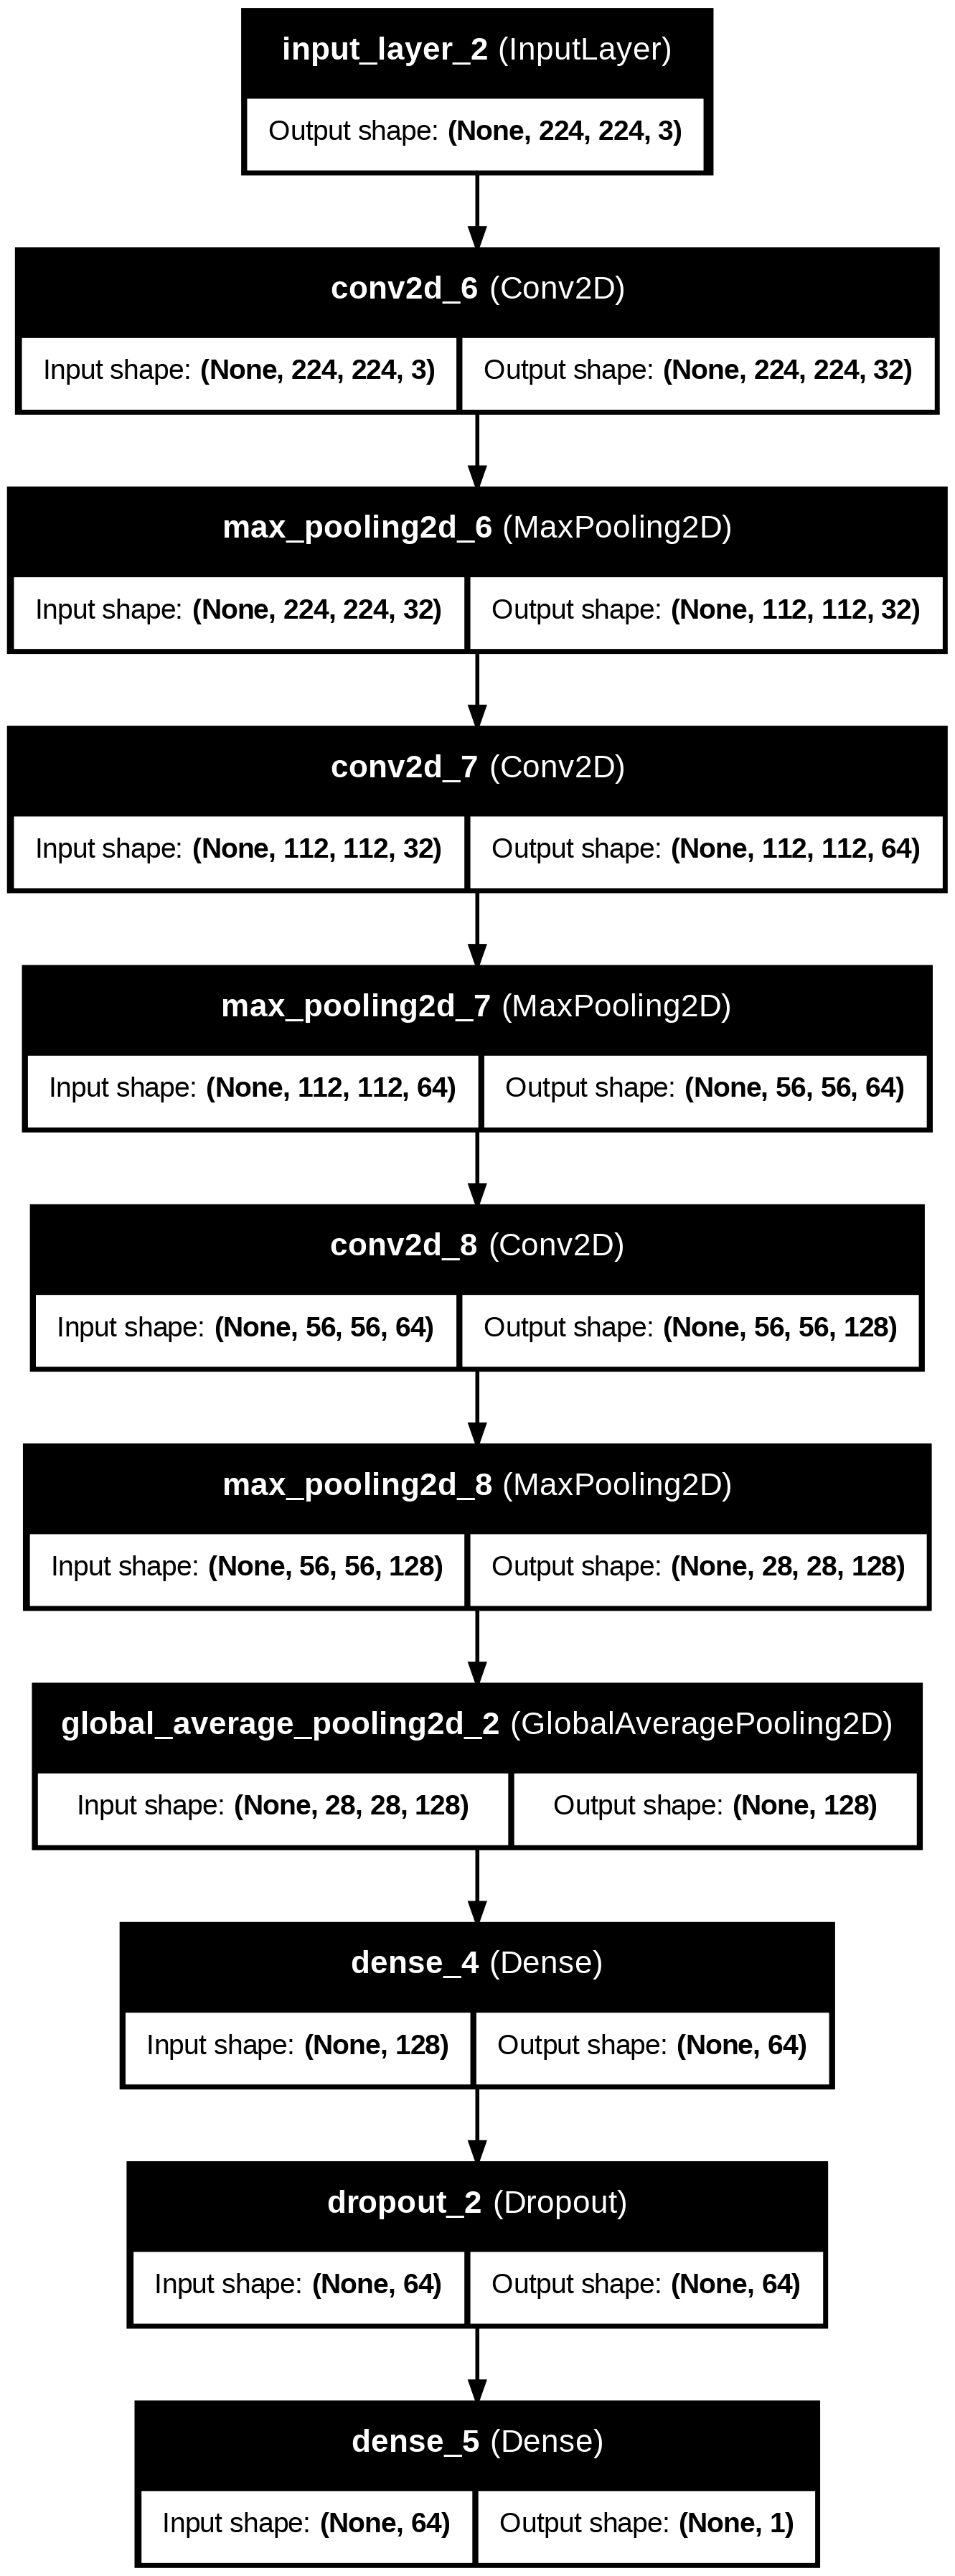

In [ ]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
fle_s = '/content/drive/MyDrive/Colab Notebooks/data/colon_cancer_model.keras'

checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')
callback_list=[checkpointer]

In [ ]:

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[checkpointer]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.5371 - loss: 0.7417
Epoch 1: loss improved from inf to 0.68380, saving model to /content/drive/MyDrive/Colab Notebooks/data/colon_cancer_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 57s 202ms/step - accuracy: 0.5373 - loss: 0.7414 - val_accuracy: 0.7745 - val_loss: 0.5605
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7576 - loss: 0.5279
Epoch 2: loss improved from 0.68380 to 0.51133, saving model to /content/drive/MyDrive/Colab Notebooks/data/colon_cancer_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 186ms/step - accuracy: 0.7577 - loss: 0.5279 - val_accuracy: 0.8245 - val_loss: 0.4317
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.8031 - loss: 0.4578
Epoch 3: loss improved from 0.51133 to 0.45789, saving model to /content/drive/MyDrive/Colab Notebooks/data/colon_cancer_model.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 47s 187ms/step - accuracy: 0.8031 - loss: 0.4578 - val_accuracy: 0.8590 

In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']


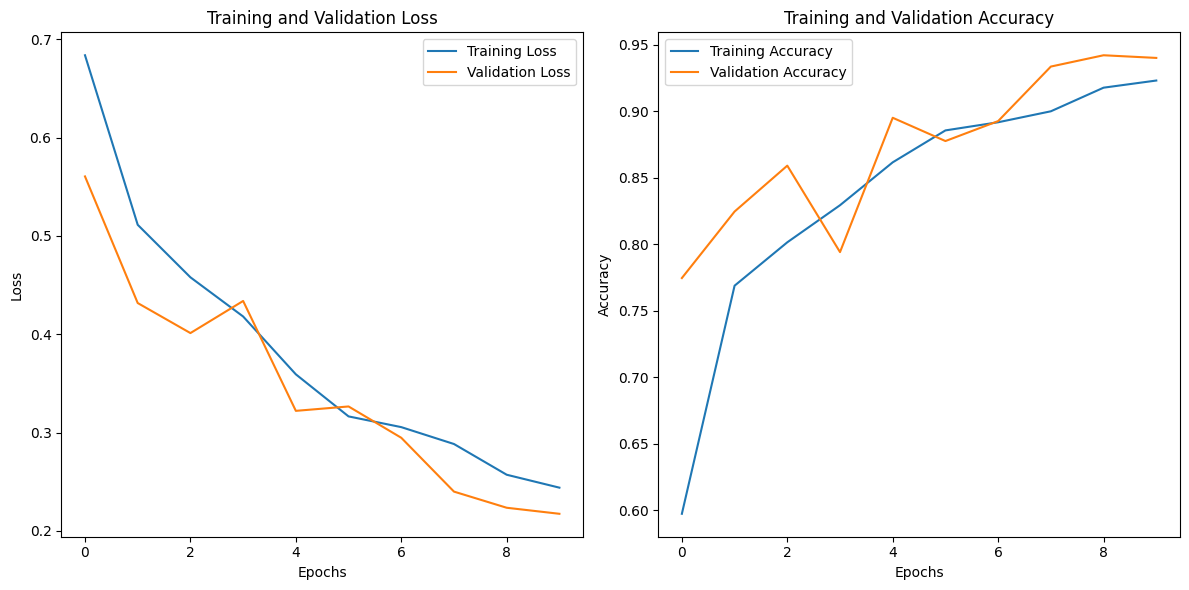

In [ ]:
import matplotlib.pyplot as plt

# Plot the loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Model testi değerlendirme
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Doğruluğu: {test_accuracy}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 127ms/step - accuracy: 0.9385 - loss: 0.2224
Test Doğruluğu: 0.9399999976158142


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 566ms/step
Tahmin edilen durum: Sağlıklı


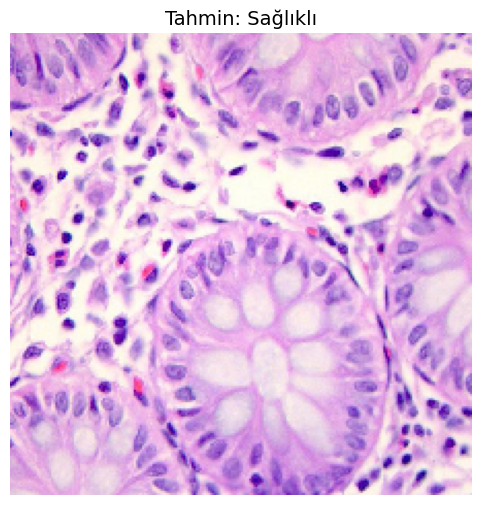

In [ ]:
img_path = '/root/.cache/kagglehub/datasets/falahgatea/colon-cancer-dataset/versions/1/colon_image_sets/colon_n/colonn10.jpeg'

# Görüntüyü yükle ve ön işlemden geçir
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Tahmin yapma
prediction = model.predict(img_array)[0][0]

# Tahmin sonucuna göre sınıflandırma
label = "Kolon Kanseri" if prediction < 0.5 else "Sağlıklı"

print(f"Tahmin edilen durum: {label}")

# Görseli görselleştirme
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Tahmin: {label}", fontsize=14)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin edilen durum: Kolon Kanseri


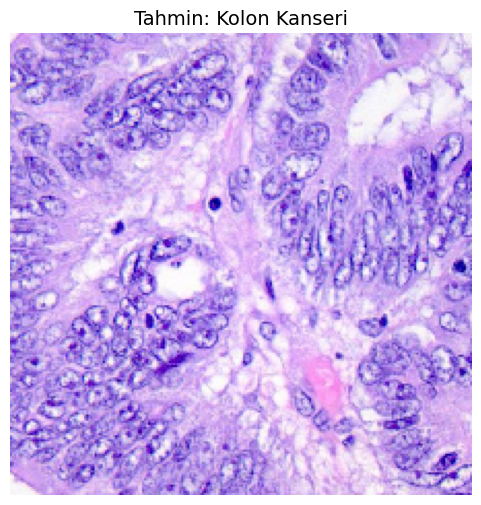

In [ ]:
img_path = '/root/.cache/kagglehub/datasets/falahgatea/colon-cancer-dataset/versions/1/colon_image_sets/colon_aca/colonca2.jpeg'

# Görüntüyü yükle ve ön işlemden geçir
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

# Tahmin yapma
prediction = model.predict(img_array)[0][0]

# Tahmin sonucuna göre sınıflandırma
label = "Kolon Kanseri" if prediction < 0.5 else "Sağlıklı"

print(f"Tahmin edilen durum: {label}")

# Görseli görselleştirme
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')
plt.title(f"Tahmin: {label}", fontsize=14)
plt.show()